# KNN (K-Nearest Neighbors)

---

Desenvolveremos, neste notebook, algumas aplicações envolvendo o KNN (K-Nearest Neighbors). Como ferramentas de implementação, estaremos usando as bibliotecas `pandas`, `matplotlib` e a função `KNeighborsClassifier` da biblioteca `sklearn`. Como bases de dados, utilizaremos a relação de crédito de alguns clientes. Por fim, plotamos gráficos que representam os resultados obtidos após a realização das predições

## Aplicação do KNN

---





Vamos importar as bibliotecas `pandas`, para separar a base de dados, e `io` e `google.colab`, para fazermos o upload do arquivo diretamente do PC

In [ ]:
import pandas as pd

In [ ]:
import io
from google.colab import files


Relizando o upload do arquivo `.xls`

In [ ]:
uploaded = files.upload()

Saving Base credito.xls to Base credito (4).xls


Atribuindo o banco de dados à variável `dataset` e verificando informações sobre ele 



In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['Base credito.xls']))
dataset.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


Percebe-se que tem 3 valores faltantes e idades negativas, ou seja, precisamos ajustá-los.
Podemos visualizar quantos valores faltantes existem em cada coluna com o seguinte código:

In [ ]:
pd.isnull(dataset).sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

Verificando as idades negativas

In [ ]:
dataset.loc[dataset['age'] < 0, 'age']

15   -28.218361
21   -52.423280
26   -36.496976
Name: age, dtype: float64

Ajustaremos os valores utilizando a média

In [ ]:
dataset['age'][dataset.age > 0].mean()

40.92770044906149

Localizando as amostras que possuem os valores negativos e faltantes para atribui-los ao valor da média

In [ ]:
dataset.loc[dataset['age'] < 0, 'age'] = 40.9
dataset.loc[pd.isnull(dataset['age']), 'age'] = 40.9

Em seguida, vamos dividir nossas variáveis em duas categorias: rotulo (default) e previsores (income, loan e age)

In [ ]:
previsores = dataset.drop(['clientid', 'default'], axis = 1)
rotulo = dataset['default']

In [ ]:
rotulo.mode()

0    0
dtype: int64

In [ ]:
display(previsores.dtypes)

income    float64
age       float64
loan      float64
dtype: object

Vamos plotar nosso gráfico de dispersão. Para isso, usaremos o `matplotlib.pyplot` e o `numpy`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
z = previsores['loan']
y = previsores['income']
x = previsores['age']

Text(0.5, 0, 'Valor do empréstimo')

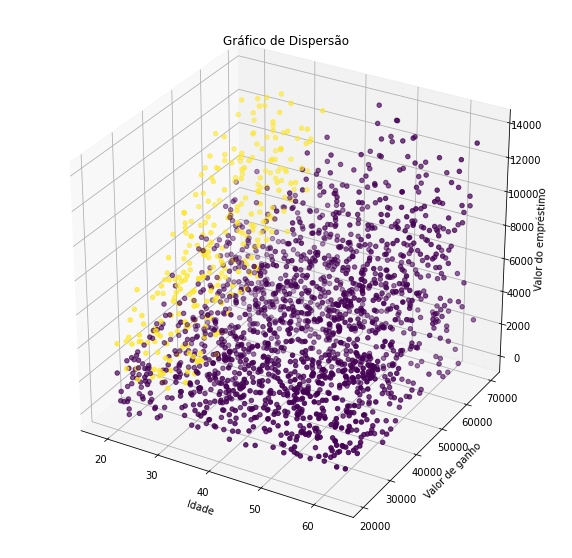

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection ="3d")
ax.scatter3D(x,y,z, c=rotulo)
plt.title('Gráfico de Dispersão')
ax.set_xlabel('Idade')
ax.set_ylabel('Valor de ganho')
ax.set_zlabel('Valor do empréstimo')

A análise do gráfico nos mostra dois rótulos: o amarelo (1 ou inadimplente) e o roxo (0 ou não inadimplente).

Importaremos a classe `StandardScaler` para padronizar as variáveis

In [ ]:
from sklearn.preprocessing import StandardScaler

Instânciamos a classe e depois fazemos a padronização (utiliza média e desvio padrão)

In [ ]:
padronizacao = StandardScaler()

previsores = padronizacao.fit_transform(previsores)

A partir da biblioteca `sklearn`, vamos importar o modelo KNN e predizer os nossos resultados

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(previsores, rotulo)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Vamos fazer uma previsão para alguém que receba 60000, tenha 40 anos e tenha um emprestimo de 8000. Se for 1, se enquadra no grupo inadimplente; caso o contrario esta no grupo que paga o emprestimo.

In [ ]:
#Perceba que é necessário escalonar os valores

amostra = padronizacao.transform([[60000,40,8000]])

resultado = knn.predict(amostra)
resultado

array([0])

Agora iremos prever para todos os demais da tabela.  Para cada atributo será gerado uma linha com 2 colunas, a coluna[0] indica a probabilidade do cliente não pagar o emprestimo e a coluna[1] do cliente pagar.



In [ ]:
resultadototal = knn.predict_proba(previsores)
resultadototal

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ]])

## Implementação do KNN _from scratch_

---



Para realizarmos a implementação do KNN, primeiramente precisamos definir uma métrica de distância. No nosso caso, usaremos a distância euclidiana, definidida da seguinte forma:

$$\text{E}(x,y)= \sqrt{\sum_{i=0}^{n}(x_i - y_i)^2}$$

Vale salientar que tal notação atende a vetores `x` e `y` com `n` dimensões

In [ ]:
def euclidean_distance(self, vec1, vec2):
    return np.sqrt(np.sum(vec1 - vec2)**2)

Com isso, podemos partir direto para a implementação, lembrando que devemos seguir os seguintes passos:
 1. Calcular a distância do ponto analisado em relação a todos os pontos do conjunto de treino;
 2. Pegar os K pontos mais próximos, baseado nas distâncias calculadas;
 3. Atribuir o rótulo da classe que mais aparece entre esses K pontos ao ponto analisado.

In [ ]:
class KNN:
    def __init__(self, n_neighbors = 3):
        self.n_neighbors = n_neighbors

    # Calcula a distância euclidiana entre dois vetores
    def __euclidean_distance(self, vec1, vec2):
        return np.sqrt(np.sum(vec1 - vec2)**2)
    
    # Guardando os dados de treino
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    # Realiza a predição com base nos vizinhos
    def predict(self, X_test):
        # Lista que conterá as previsões
        predictions = []

        for i in range(len(X_test)):
            # Primeiramente, encontramos a distância para todos as instância de X
            distances = []
            for instance in self.X_train:
                dist = self.__euclidean_distance(X_test[i], instance)
                distances.append((instance, dist))              # Aqui, armazenamos uma tupla, que guarda a instância em si, e sua distância
            
            # Após isso, ordenaremos a lista em ordem crescente, de acordo com a distância, representada pelo segundo elemento de nossa tupla, ou seja, tup[1]
            distances.sort(key=lambda tup: tup[1])

            # E logo depois, armazenamos os K vizinhos mais próximos
            neighbors = []
            for idx in range(self.n_neighbors):
                neighbors.append(distances[idx][0])

            # Preenchendo um dicionário com a quantidade de vezes que cada vizinho apareceu
            neighbors_count = {}
            for neighbor in neighbors:
                if self.y_train[neighbor] in neighbors_count:
                    neighbors_count[self.y_train[neighbor]] += 1
                else:
                    neighbors_count[self.y_train[neighbor]] = 1
            
            # Aqui ordenamos nossa lista de vizinhos de acordo com sua quantidade, de forma decrescente
            sorted_neighbors_count = sorted(neighbors_count.items(), key=lambda item: item[1], reverse=True)
            
            # Guardando nossa predição, que se trata justamente do primeiro item, que é o vizinho que mais aparece
            predictions.append(sorted_neighbors_count[0][0])

        return predictions

## Referências

---
[Develop k-Nearest Neighbors in Python From Scratch](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/) \
[KNN from Scratch](https://aiaspirant.com/knn-from-scratch/)